# k-Nearest Neighbor (KNN) Simple Review and Used Case Project Cancer Detection
k-NN is a lazy model for machine learning. Lets look at the simple dataset iris for some simple kNN model

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [5]:
df = sns.load_dataset('iris')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [16]:
to_num = {'setosa':0,
          'versicolor':1,
          'virginica':2}
df['tmp'] = df['species'].map(to_num)

In [21]:
X = df[['petal_length', 'petal_width']]
y = df['tmp']

In [22]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


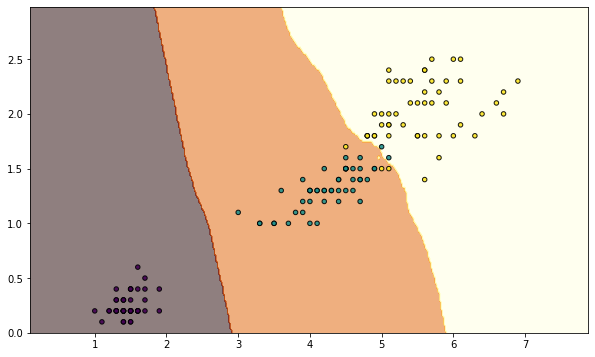

In [39]:
Xv = X.values.reshape(-1,1)
h = 0.02
xmin, xmax = Xv.min(), Xv.max() + 1
ymin, ymax = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h),
                     np.arange(ymin, ymax, h))

z = knn.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(10,6))
ax = plt.contourf(xx, yy, z, alpha = 0.5, cmap='afmhot')
plt.scatter(X.values[:,0], X.values[:,1], c=y, s=20, alpha=0.9, edgecolors='k')
plt.show()

## Project Cancer Detection

In [40]:
col = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
       'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data

--2022-01-12 13:36:10--  https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19889 (19K) [application/x-httpd-php]
Saving to: ‘breast-cancer-wisconsin.data’

breast-cancer-wisco 100%[===================>]  19.42K  --.-KB/s    in 0.05s   

2022-01-12 13:36:10 (382 KB/s) - ‘breast-cancer-wisconsin.data’ saved [19889/19889]



In [41]:
df = pd.read_csv('/content/breast-cancer-wisconsin.data', names=col, header=None)
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [43]:
df.isnull().sum()

id                             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [44]:
df.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [45]:
df[df['Bare Nuclei']=='?']

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [46]:
df = df[df['Bare Nuclei'] != '?']

In [48]:
df.shape

(683, 11)

In [49]:
df['Class'] = df['Class'] / 2 - 1

In [50]:
X = df.drop(['id', 'Class'], axis=1)
y = df['Class']

In [51]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X_s = s.fit_transform(X)

In [54]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')

In [56]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [57]:
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_train)
  if train:
    yhat = clf.predict(X_train)
    print('Training Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_train,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_train,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_train,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_train),lb.transform(yhat))))
  elif train == False:
    yhat = clf.predict(X_test)
    print('Testing Result:\n')
    print('Accuracy Score \t\t: {0:.4f}\n'.format(accuracy_score(y_test,yhat)))
    print('Classification Report \t: \n{}\n'.format(classification_report(y_test,yhat)))
    print('Confusion Matrix \t: \n{}\n'.format(confusion_matrix(y_test,yhat)))
    print('ROC AUC Score \t\t: {0:.4f}'.format(roc_auc_score(lb.transform(y_test),lb.transform(yhat))))


In [58]:
print_score(knn, X_train, X_test, y_train, y_test, train=True)
print('----------------------------------')
print_score(knn, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9744

Classification Report 	: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix 	: 
[[358   7]
 [  7 174]]

ROC AUC Score 		: 0.9711
----------------------------------
Testing Result:

Accuracy Score 		: 0.9489

Classification Report 	: 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix 	: 
[[78  1]
 [ 6 52]]

ROC AUC Score 		: 0.9419


In [59]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10]}

grid = GridSearchCV(KNeighborsClassifier(), params,
                    n_jobs = -1, verbose = 1, cv = 10)

In [60]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=1)

In [62]:
grid.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [63]:
print_score(grid, X_train, X_test, y_train, y_test, train=True)
print('----------------------------------')
print_score(grid, X_train, X_test, y_train, y_test, train=False)

Training Result:

Accuracy Score 		: 0.9744

Classification Report 	: 
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       365
         1.0       0.96      0.96      0.96       181

    accuracy                           0.97       546
   macro avg       0.97      0.97      0.97       546
weighted avg       0.97      0.97      0.97       546


Confusion Matrix 	: 
[[358   7]
 [  7 174]]

ROC AUC Score 		: 0.9711
----------------------------------
Testing Result:

Accuracy Score 		: 0.9489

Classification Report 	: 
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96        79
         1.0       0.98      0.90      0.94        58

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137


Confusion Matrix 	: 
[[78  1]
 [ 6 52]]

ROC AUC Score 		: 0.9419
